In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb
from modules import transfer_entropy as TE
from multiprocessing import Process

C:\Users\succa\anaconda3\lib\site-packages\tigramite\plotting.py:26: UserWarning: [Errno 2] No such file or directory: 'C:\\Users\\succa\\anaconda3\\lib\\site-packages\\tigramite\\..\\versions.py'
  warnings.warn(str(e))
C:\Users\succa\anaconda3\lib\site-packages\tigramite\independence_tests\gpdc.py:27: UserWarning: [Errno 2] No such file or directory: 'C:\\Users\\succa\\anaconda3\\lib\\site-packages\\tigramite\\independence_tests\\..\\..\\versions.py'
  warnings.warn(str(e))
C:\Users\succa\anaconda3\lib\site-packages\tigramite\independence_tests\gpdc_torch.py:33: UserWarning: No module named 'gpytorch'
  warnings.warn(str(e))


In [ ]:
df = pd.read_csv("data/Times_series_sa_det.csv")
lista = ["Atlanta-Sandy Springs-Alpharetta, GA MSA",
    "Baltimore-Columbia-Towson, MD MSA",
    "Boston-Cambridge-Newton, MA-NH MSA",
    "Chicago-Naperville-Elgin, IL-IN-WI MSA",
    "Dallas-Fort Worth-Arlington, TX MSA",
    "Denver-Aurora-Lakewood, CO MSA",
    "Detroit–Warren–Dearborn, MI MSA",
    "Houston-The Woodlands-Sugar Land, TX MSA",
    "Los Angeles-Long Beach-Anaheim, CA MSA",
    "Miami-Fort Lauderdale-West Palm Beach, FL MSA",
    "Minneapolis-St. Paul-Bloomington, MN-WI MSA",
    "New York-Newark-Jersey City, NY-NJ-PA MSA",
    "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",
    "Phoenix-Mesa-Chandler, AZ MSA",
    "Riverside-San Bernardino-Ontario, CA MSA",
    "San Francisco-Oakland-Berkeley, CA MSA",
    "Tampa-St. Petersburg-Clearwater, FL MSA",
    "Washington-Arlington-Alexandria, DC-VA-MD-WV MSA"]

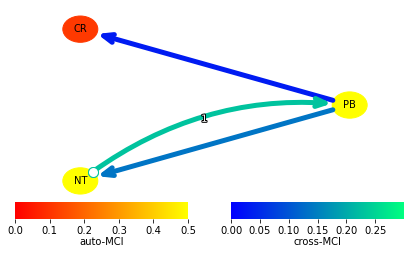

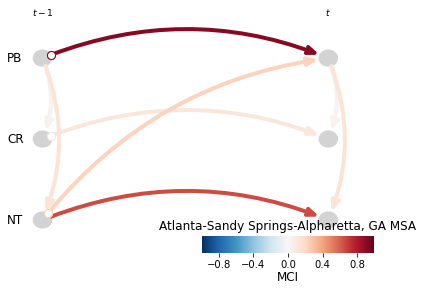

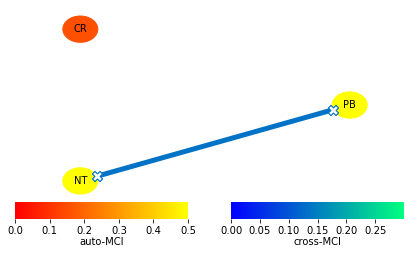

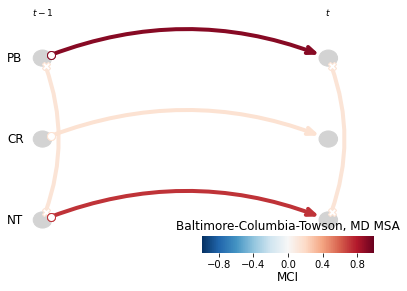

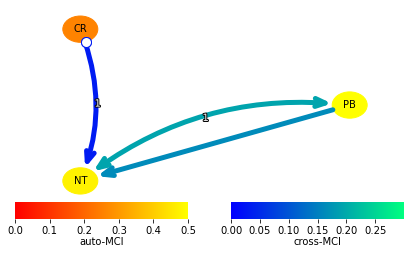

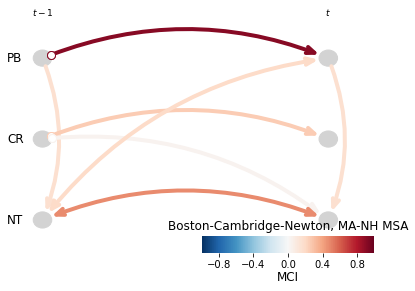

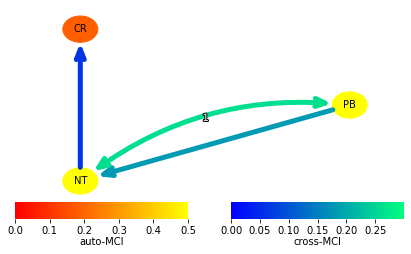

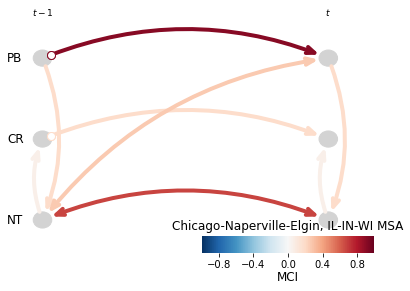

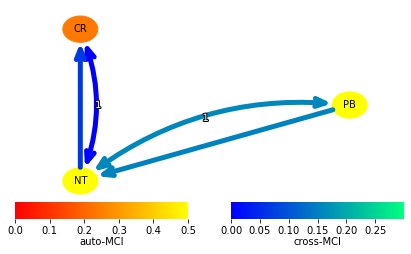

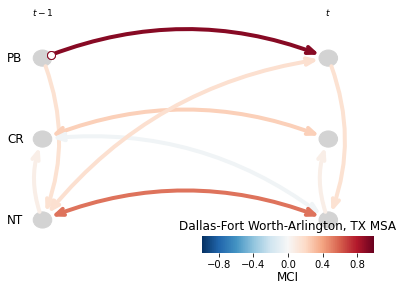

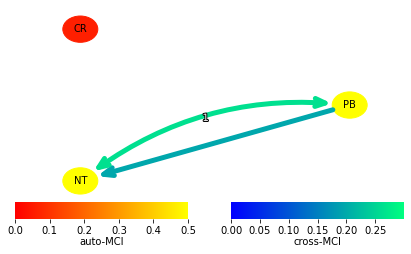

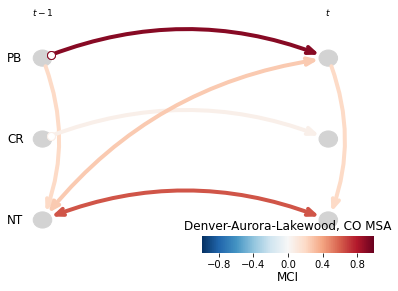

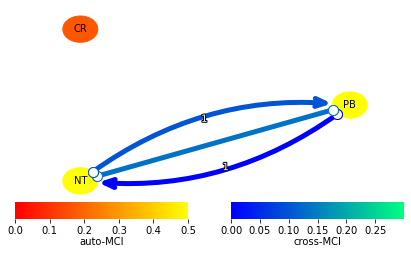

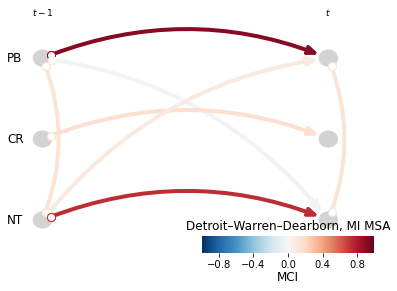

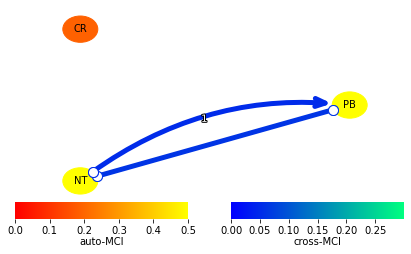

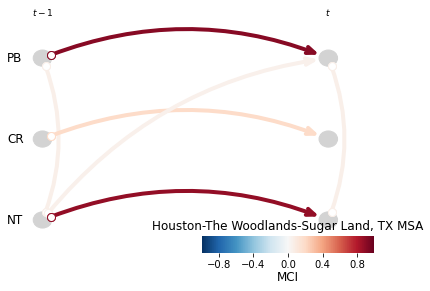

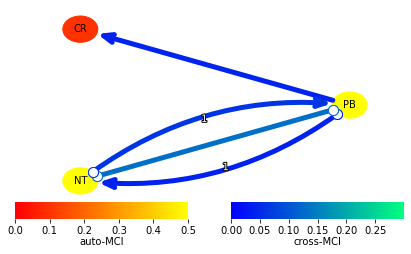

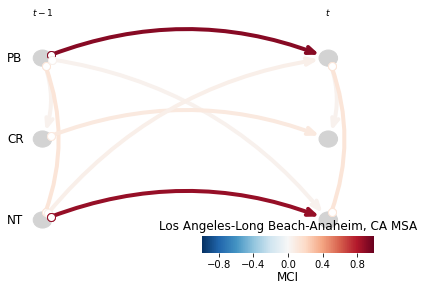

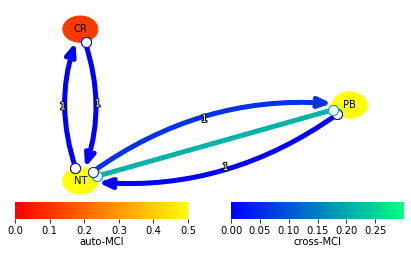

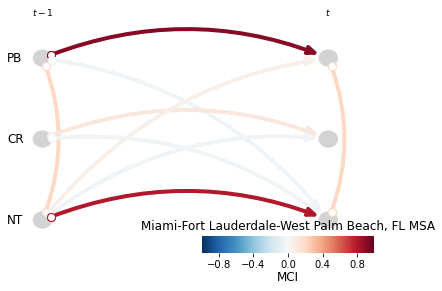

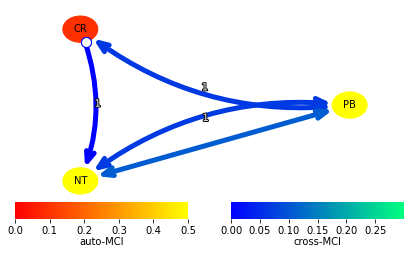

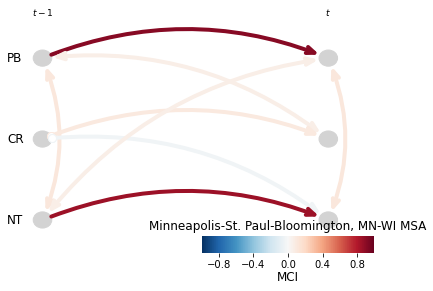

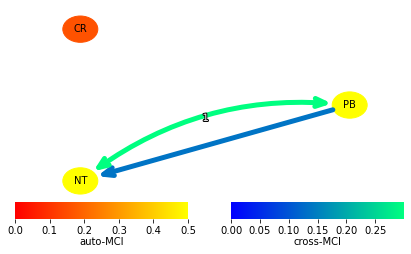

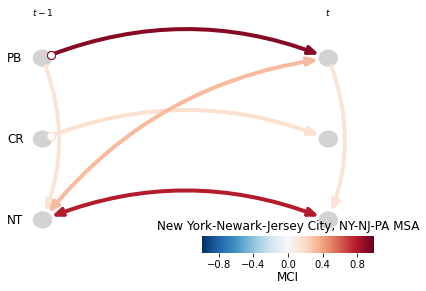

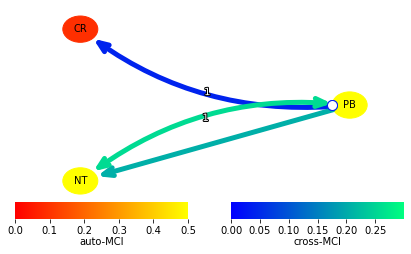

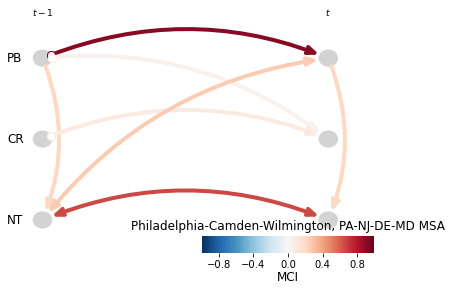

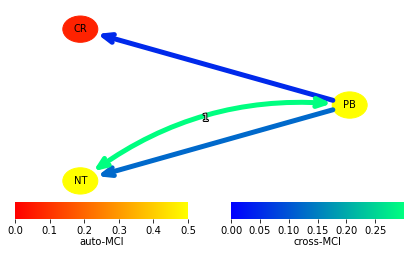

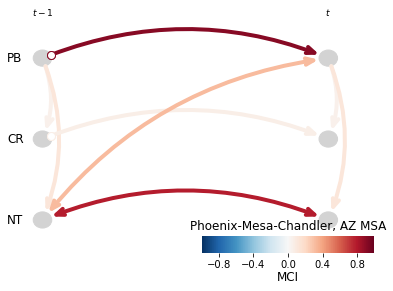

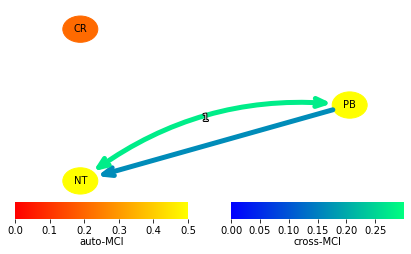

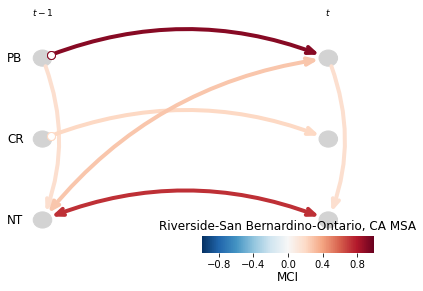

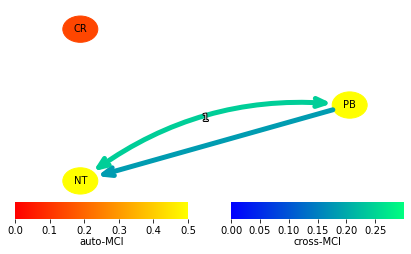

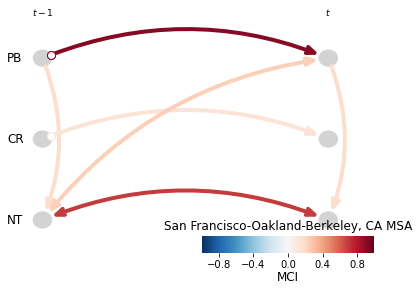

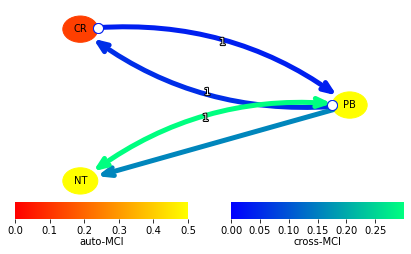

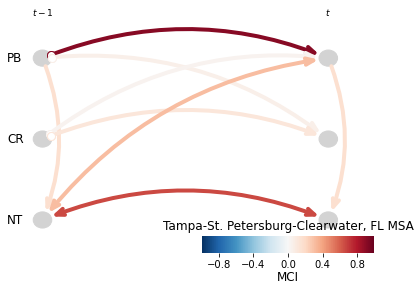

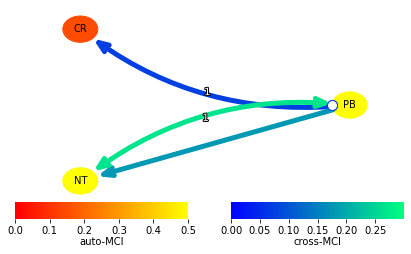

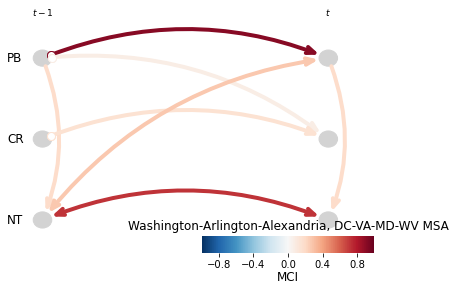

,area,rho,pvalue
0,"Atlanta-Sandy Springs-Alpharetta, GA MSA",0.1374,0.0000
1,"Baltimore-Columbia-Towson, MD MSA",0.1353,0.0000
2,"Boston-Cambridge-Newton, MA-NH MSA",0.1632,0.0000
3,"Chicago-Naperville-Elgin, IL-IN-WI MSA",0.1813,0.0000
4,"Dallas-Fort Worth-Arlington, TX MSA",0.1528,0.0000
5,"Denver-Aurora-Lakewood, CO MSA",0.1965,0.0000
6,"Detroit–Warren–Dearborn, MI MSA",0.1351,0.0000
7,"Houston-The Woodlands-Sugar Land, TX MSA",0.0616,0.0002
8,"Los Angeles-Long Beach-Anaheim, CA MSA",0.1306,0.0000
9,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",0.2098,0.0000


In [ ]:
df_re = pd.DataFrame(columns=['area','rho', 'pvalue'])
for arg in lista:
    PT = df["Tweet search - "+arg+"_sentNumber_Positive_sa_det"]
    NT = df["Tweet search - "+arg+"_sentNumber_Negative_sa_det"]
    CR = df[arg+"_crimes_lagged_sa_det"] 
    PB = df["Police_Brutality_lagged_sa_det"]
    data = np.array([PB,CR,NT]).T
    T, N = data.shape
    var_names = ["PB", "CR","NT"]
    parcorr = ParCorr(significance='analytic')
    dataframe = pp.DataFrame(data,
                         datatime = np.arange(len(data)),
                         var_names=var_names)
    lpcmci = LPCMCI(dataframe=dataframe, 
                cond_ind_test=parcorr)
    
    results = lpcmci.run_lpcmci(tau_max=1,
                            pc_alpha=0.05)

    df_re.loc[len(df_re.index)] = [arg, round(results["val_matrix"][0][2,0],4),round(results["p_matrix"][0][2,0],4)] 
    tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=0.,
    vmax_edges = 0.3,
    edge_ticks=0.05,
    cmap_edges='winter',
    vmin_nodes=0,
    vmax_nodes=.5,
    node_ticks=.1,
    cmap_nodes='autumn',
    );
    tp.plot_time_series_graph(
        figsize=(6, 4),
        val_matrix=results['val_matrix'],
        graph=results['graph'],
        var_names=var_names,
        link_colorbar_label='MCI',
        ); plt.title(arg); plt.show()
    #print(results)
df_re